# Analysis of QNB binding in rat’s muscarinic acetylcholine receptor through filter binding assay
## Python Markdown (Supplementary Material)
By B237870-2023

### Import necessary libraries
In this first section, all necessary libraries were imported. All af them will be used later at different stages of the code

In [1]:
#Import the necessary libraries
!pip install lmfit # Installs lmfit (necessary for the fit of the binding model to obtain the Kd)
import matplotlib.pyplot as plt # Imports matplotlib to plot graphs
import numpy as np # Imports Numpy to perform mathematical operations
%matplotlib inline 
import statistics as stat # Imports statistics to perform statistical analysis
import lmfit # Imports lmfit for fitting the binding model

  Using cached lmfit-1.2.2-py3-none-any.whl (102 kB)
  Using cached uncertainties-3.1.7-py2.py3-none-any.whl (98 kB)


### Convertion factors
Establish convertion factors to be used for unit convertion through out the code

In [2]:
convTime=60 # Conversion for minutes to seconds
efficacy=2 # Efficacy of cps (2 dps= 1 cps)
convBec=1120 # Conversion for dps to pmol
day1MembVol=4 # Volume in microliters of rat membrane added to each flask during day 1
day23MembVol=2 # Volume in microliters of rat membrane added to each flask during days 2 and 3
convMass=0.001 # Conversion for microgram to mg
convNanoToPico=1000 # Conversion for nanomolar to picomolar
convMicroToMili=0.001 # Conversion for micrograms to miligrams

### Lowry Assay (For days 1 and 2)
Code for getting the protein concentration for days 1 and 2

In [3]:
#Lowry Assay Module (Day 2)
samp1=[0, 0.264, 0.44, 0.614, 0.811] # Sample 1 absorbance of BSA at 660 nm (results from group C)
samp2=[0, 0.265, 0.443, 0.618, 0.812] # Sample 2 absorbance of BSA at 660 nm (results from group C)
samp3=[0, 0.266, 0.444, 0.619, 0.814] # Sample 3 absorbance of BSA at 660 nm (results from group C)
concBSA1=[0,50,100,150,200] # Concentration of BSA in micrograms/mL
avgAbs1=[1,2,3,4,5]
sdAbs1=[1,2,3,4,5]
for i in range(len(avgAbs1)):
    avgAbs1[i]=((samp1[i]+samp2[i]+samp3[i])/3)
    sdAbs1[i]=np.sqrt(((samp1[i]-avgAbs1[i])**2)+((samp2[i]-avgAbs1[i])**2)+((samp3[i]-avgAbs1[i])**2)/2)
ratMemb1=[0.592,0.592,0.594] # Absorbance of rat membrane samples at 660 nm (results from group C)
avgRatMem1=0
for i in range(len(ratMemb1)):
    avgRatMem1=avgRatMem1+ratMemb1[i]
avgRatMem1=avgRatMem1/3 # Average of absorbance of rat membrane at 660 nm
#Linear regression to get curve
Lowry1=np.polyfit(concBSA1,avgAbs1,1)
regEquationLowry1=np.poly1d(Lowry1)
ratMemConc1=(avgRatMem1-Lowry1[1])/Lowry1[0]
print("Equation for linear regression is: ", regEquationLowry1)
print("Concentration of rat membrane protein is ", ratMemConc1, " micrograms/mL")

Equation for linear regression is:   
0.003953 x + 0.032
Concentration of rat membrane protein is  141.82124789207413  micrograms/mL


Graph for Lowry Assay of day 2

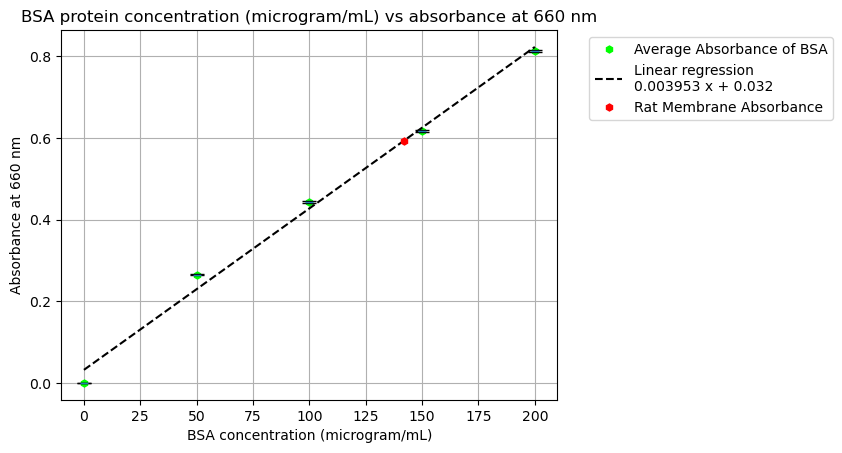

In [4]:
plt.figure()
plt.subplot()
plt.plot(concBSA1,avgAbs1, 'h', markersize=5,color="lime",label="Average Absorbance of BSA")
plt.errorbar(concBSA1,avgAbs1,yerr=sdAbs1,ecolor="black",fmt="_",capsize=5)
plt.plot(concBSA1,regEquationLowry1(concBSA1),"--k",label="Linear regression" + str(regEquationLowry1))
plt.plot(ratMemConc1,avgRatMem1,'h',color="red",markersize=5,label="Rat Membrane Absorbance")
plt.title('BSA protein concentration (microgram/mL) vs absorbance at 660 nm')
plt.xlabel("BSA concentration (microgram/mL)")
plt.ylabel("Absorbance at 660 nm")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

### Lowry Assay (For day 3)
Code for getting the protein concentration for day 3

In [5]:
#Lowry Assay Module (Day 3)
samp4=[0, 0.177,0.385,0.529,0.659] # Sample 4 absorbance of BSA at 660 nm
samp5=[0, 0.201,0.401,0.560,0.708] # Sample 5 absorbance of BSA at 660 nm
samp6=[0, 0.203,0.400,0.563,0.717] # Sample 6 absorbance of BSA at 660 nm
samp7=[0,0.205,0.403,0.568,0.726] # Sample 6 absorbance of BSA at 660 nm
concBSA2=[0,50,100,150,200] # Concentration of BSA in micrograms/mL
avgAbs2=[1,2,3,4,5]
sdAbs2=[1,2,3,4,5]
for i in range(len(avgAbs2)):
    avgAbs2[i]=((samp4[i]+samp5[i]+samp6[i]+samp7[i])/4)
    sdAbs2[i]=np.sqrt(((samp4[i]-avgAbs2[i])**2)+((samp5[i]-avgAbs2[i])**2)+((samp6[i]-avgAbs2[i])**2)+((samp7[i]-avgAbs2[i])**2)/3)
ratMemb2=[0.551,0.603,0.616,0.625] # Absorbance of rat membrane samples at 660 nm
avgRatMem2=0
for i in range(len(ratMemb2)):
    avgRatMem2=avgRatMem2+ratMemb2[i]
avgRatMem2=avgRatMem2/4 # Average of absorbance of rat membrane at 660 nm
#Linear regression to get curve
Lowry2=np.polyfit(concBSA2,avgAbs2,1)
regEquationLowry2=np.poly1d(Lowry2)
ratMemConc2=(avgRatMem2-Lowry2[1])/Lowry2[0]
print("Equation for linear regression is: ", regEquationLowry2)
print("Concentration of rat membrane protein is ", ratMemConc2, " micrograms/mL")

Equation for linear regression is:   
0.003527 x + 0.01755
Concentration of rat membrane protein is  164.78593705698893  micrograms/mL


Graph for Lowry Assay of day 3

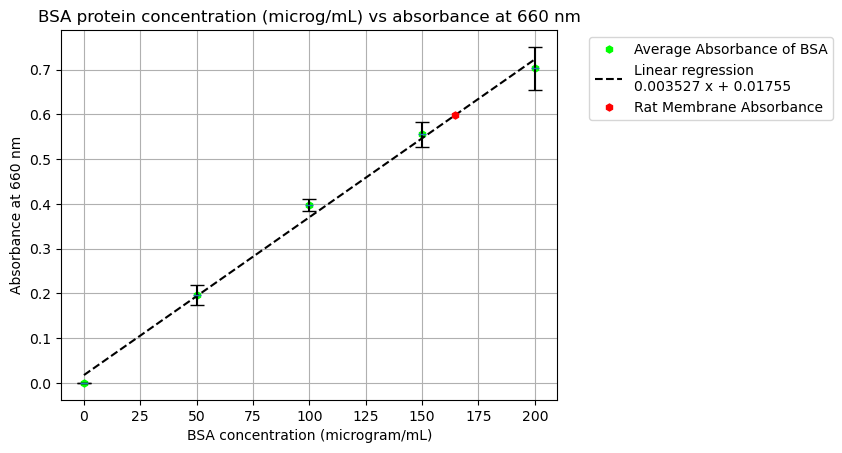

In [6]:
plt.figure()
plt.subplot()
plt.plot(concBSA2,avgAbs2, 'h', markersize=5,color="lime",label="Average Absorbance of BSA")
plt.errorbar(concBSA2,avgAbs2,yerr=sdAbs2,ecolor="black",fmt="_",capsize=5)
plt.plot(concBSA2,regEquationLowry2(concBSA2),"--k",label="Linear regression" + str(regEquationLowry2))
plt.plot(ratMemConc2,avgRatMem2,'h',color="red",markersize=5,label="Rat Membrane Absorbance")
plt.title('BSA protein concentration (microg/mL) vs absorbance at 660 nm')
plt.xlabel("BSA concentration (microgram/mL)")
plt.ylabel("Absorbance at 660 nm")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

### Day 1 Results
Results of the assay to measure the total QNB binding to the receptor, non specific QNB binding and obtain the specific QNB binding to the receptor

In [7]:
# Day 1 Results
day1Samples=3 # Total number of samples for each treatment
time=[0,12,25,36,45,60] #Time in minutes for each measurment 
water1=[5290.47,5676.03,7416.44,7372.6,7476.03,7745.97] # No atropine sample 1 (cpm)
water2=[5600.49,5827.29,7201.18,7322.48,7909.07,7461.33] # No atropine sample 2 (cpm)
water3=[4389.29,6091.82,7165.68,7667.39,8234.86,7473.71] # No atropine sample 3 (cpm)
atropine1=[626.17,792.93,461.04,689.31,701.44,779.32] # Atropine sample 1 (cpm)
atropine2=[644.79,1163.71,598.3,762.32,626.18,822.45] # Atropine sample 2 (cpm)
atropine3=[588.54,908.32,473.91,610.93,724.07,841.46] # Atropine sample 3 (cpm)
averageWater=[1,2,3,4,5,6] # Average of no atropine (for total binding) (cpm)
sdWater=[1,2,3,4,5,6]
sdAtropine=[1,2,3,4,5,6] 
averageAtropine=[1,2,3,4,5,6] # Average of atropine (for non specific binding) (cpm)
averageSpecific=[1,2,3,4,5,6] # Average of specific binding (cpm)
sdSpecific=[1,2,3,4,5,6]
for i in range(len(time)):
    water1[i]=(water1[i]*efficacy)/(convTime*convBec) # Conversion of sample 1 of total to pmol
    water2[i]=(water2[i]*efficacy)/(convTime*convBec) # Conversion of sample 2 of total to pmol
    water3[i]=(water3[i]*efficacy)/(convTime*convBec) # Conversion of sample 3 of total to pmol
    atropine1[i]=(atropine1[i]*efficacy)/(convTime*convBec) # Conversion of sample 1 of non-specific to pmol
    atropine2[i]=(atropine2[i]*efficacy)/(convTime*convBec) # Conversion of sample 2 of non-specific to pmol
    atropine3[i]=(atropine3[i]*efficacy)/(convTime*convBec) # Conversion of sample 3 of non-specific to pmol
    averageWater[i]=((water1[i]+water2[i]+water3[i])/day1Samples)
    averageAtropine[i]=((atropine1[i]+atropine2[i]+atropine3[i])/day1Samples)
    sdWater[i]=np.sqrt(((water1[i]-averageWater[i])**2)+((water2[i]-averageWater[i])**2)+((water3[i]-averageWater[i])**2)/(day1Samples-1))
    sdAtropine[i]=np.sqrt(((atropine1[i]-averageAtropine[i])**2)+((atropine2[i]-averageAtropine[i])**2)+((atropine3[i]-averageAtropine[i])**2)/(day1Samples-1))
    averageSpecific[i]=(averageWater[i]-averageAtropine[i])
    sdSpecific[i]=np.sqrt((sdWater[i]**2)+(sdAtropine[i]**2))
mgProtDay1=ratMemConc1*day1MembVol*convMicroToMili # Mass of protein in the experiment in mg
averageAtropineperMg=[]
averageWaterperMg=[]
averageSpecificperMg=[]
sdWaterperMg=[]
sdAtropineperMg=[]
sdSpecificperMg=[]
for i in range(len(time)):
    averageAtropineperMg.append(averageAtropine[i]/mgProtDay1) # Total QNB binding in pmol/mg of protein 
    averageWaterperMg.append(averageWater[i]/mgProtDay1) # Non-specific QNB binding in pmol/mg of protein
    averageSpecificperMg.append(averageSpecific[i]/mgProtDay1) # Specific QNB binding in pmol/mg of protein
    sdAtropineperMg.append(sdAtropine[i]/mgProtDay1)
    sdWaterperMg.append(sdWater[i]/mgProtDay1)
    sdSpecificperMg.append(sdSpecific[i]/mgProtDay1)

Graph of results of day 1 (Total, Non-specific and specific binding and time)

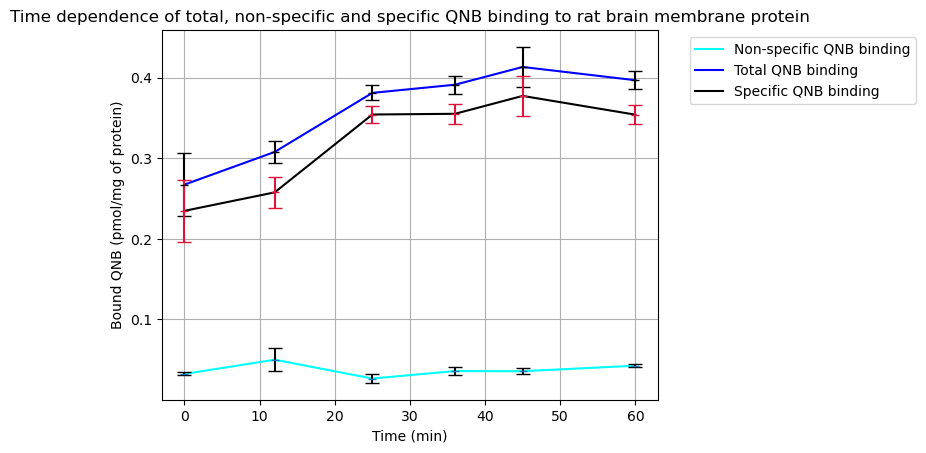

In [8]:
plt.figure()
plt.subplot()
plt.plot(time,averageAtropineperMg, markersize=5,color="cyan",label="Non-specific QNB binding")
plt.errorbar(time,averageAtropineperMg,yerr=sdAtropineperMg,ecolor="black",fmt="_",capsize=5)
plt.subplot()
plt.plot(time,averageWaterperMg, markersize=5,color="blue",label="Total QNB binding")
plt.errorbar(time,averageWaterperMg,yerr=sdWaterperMg,color="black",fmt="_",capsize=5)
plt.subplot()
plt.plot(time,averageSpecificperMg,color="black",markersize=5,label="Specific QNB binding")
plt.errorbar(time,averageSpecificperMg,yerr=sdSpecificperMg,color="crimson",fmt="_",capsize=5)
plt.title('Time dependence of total, non-specific and specific QNB binding to rat brain membrane protein')
plt.xlabel("Time (min)")
plt.ylabel("Bound QNB (pmol/mg of protein)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

Graph of results of day 1 (Specific binding and time)

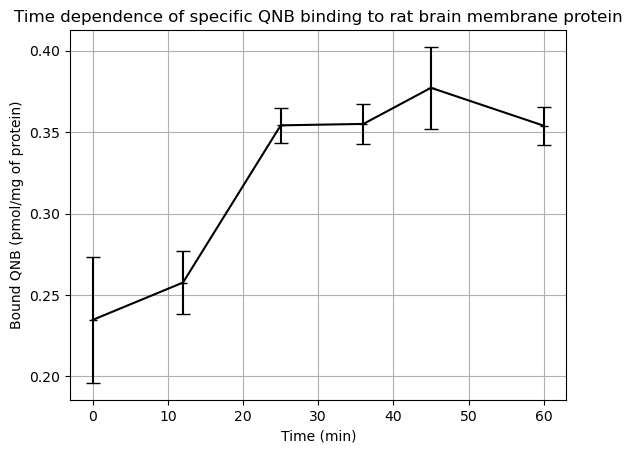

In [9]:
plt.figure()
plt.subplot()
plt.plot(time,averageSpecificperMg,color="black",markersize=5,label="Specific QNB binding")
plt.errorbar(time,averageSpecificperMg,yerr=sdSpecificperMg,color="black",fmt="_",capsize=5)
plt.title('Time dependence of specific QNB binding to rat brain membrane protein')
plt.xlabel("Time (min)")
plt.ylabel("Bound QNB (pmol/mg of protein)")
plt.grid()
plt.show()

### Day 2 results
Results of the assay to calculate the IC50 of atropine (potency of atropine to displace 50% of QNB specific binding)

In [10]:
day2Samples=3 # Total number of samples for each treatment
A=[1862.37,2164.64,1144.08] # Tube A results (cpm)
B=[1087.45, 1107.83, 2031.54] # Tube B results (cpm)
C=[2042.52, 1838.51, 3547.63] # Tube C results (cpm)
D=[3683.4,3080.1,3241.49] # Tube D results (cpm)
E=[4855.75, 4701.11, 10649.96] # Tube E results (cpm)
F=[6619.15,7213.83,6193.13] # Tube F results (cpm)
G=[5260.68, 7870.65, 8626.22] # Tube G results (cpm)
for i in range(len(A)): # Loop to calculate results of each sample tube to pmol
    A[i]=(A[i]*efficacy)/(convTime*convBec) # Tube A results (pmol)
    B[i]=(B[i]*efficacy)/(convTime*convBec) # Tube A results (pmol)
    C[i]=(C[i]*efficacy)/(convTime*convBec) # Tube A results (pmol)
    D[i]=(D[i]*efficacy)/(convTime*convBec) # Tube A results (pmol)
    E[i]=(E[i]*efficacy)/(convTime*convBec) # Tube A results (pmol)
    F[i]=(F[i]*efficacy)/(convTime*convBec) # Tube A results (pmol)
    G[i]=(G[i]*efficacy)/(convTime*convBec) # Tube A results (pmol)
avgA=stat.mean(A)
sdA=np.sqrt(((A[0]-avgA)**2)+((A[1]-avgA)**2)+((A[2]-avgA)**2)/(day2Samples-1))
avgB=stat.mean(B)
sdB=np.sqrt(((B[0]-avgB)**2)+((B[1]-avgB)**2)+((B[2]-avgB)**2)/(day2Samples-1))
avgC=stat.mean(C)
sdC=np.sqrt(((C[0]-avgC)**2)+((C[1]-avgC)**2)+((C[2]-avgC)**2)/(day2Samples-1))
avgD=stat.mean(D)
sdD=np.sqrt(((D[0]-avgD)**2)+((D[1]-avgD)**2)+((D[2]-avgD)**2)/(day2Samples-1))
avgE=stat.mean(E)
sdE=np.sqrt(((E[0]-avgE)**2)+((E[1]-avgE)**2)+((E[2]-avgE)**2)/(day2Samples-1))
avgF=stat.mean(F)
sdF=np.sqrt(((F[0]-avgF)**2)+((F[1]-avgF)**2)+((F[2]-avgF)**2)/(day2Samples-1))
avgG=stat.mean(G)
sdG=np.sqrt(((G[0]-avgG)**2)+((G[1]-avgG)**2)+((G[2]-avgG)**2)/(day2Samples-1))
concAtropine=[1.5,0.3,0.06,0.012,0.0024,0.00048,0] # Concentration of atropine in micro Molar of each tube
logConcAtropine=[1,2,3,4,5,6,7]
for i in range(len(concAtropine)):
    logConcAtropine[i]=np.log10(concAtropine[i]) # Get the logarithm (base 10) of the concentration of atropine in micro molar
boundQNBDay2=[avgA,avgB,avgC,avgD,avgE,avgF,avgG] # Bound QNB in pmol for each concentration of atropine
sdBoundQNBDay2=[sdA,sdB,sdC,sdD,sdE,sdF,sdG] # Standard deviation in pmol of each concentration of atropine
boundQNBDay2perProt=[]
sdBoundQNBDay2perProt=[]
mgProtDay2=ratMemConc1*day23MembVol*convMicroToMili # Mass of protein in the experiment in mg
for i in range(len(concAtropine)):
    boundQNBDay2perProt.append(boundQNBDay2[i]/mgProtDay2)
    sdBoundQNBDay2perProt.append(sdBoundQNBDay2[i]/mgProtDay2)
QNB50=((boundQNBDay2perProt[6]-boundQNBDay2perProt[0])/2)+boundQNBDay2perProt[0]
IC50=10**((logConcAtropine[3]*(boundQNBDay2perProt[4]-QNB50)/(boundQNBDay2perProt[4]-boundQNBDay2perProt[3]))+(logConcAtropine[4]*(boundQNBDay2perProt[3]-QNB50)/(boundQNBDay2perProt[3]-boundQNBDay2perProt[4])))
print("IC50 of atropine is " + str(IC50) + " micro molar")

IC50 of atropine is 0.00695293376169731 micro molar


/tmp/ipykernel_140/3510008516.py:34: RuntimeWarning: divide by zero encountered in log10
  logConcAtropine[i]=np.log10(concAtropine[i]) # Get the logarithm (base 10) of the concentration of atropine in micro molar


Graph of results of day 2 (Relative potency of atropine in reducing QNB binding to the protein receptor)

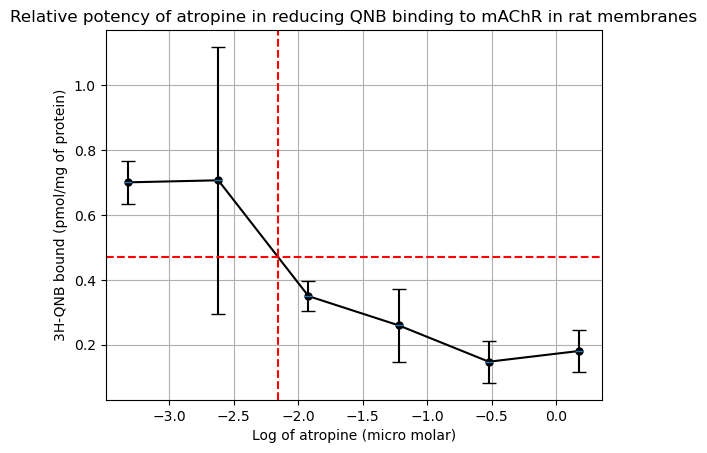

In [11]:
plt.figure()
plt.subplot()
plt.plot(logConcAtropine,boundQNBDay2perProt,'-o', color="black",markersize=5)
plt.errorbar(logConcAtropine,boundQNBDay2perProt,yerr=sdBoundQNBDay2perProt,ecolor="black",fmt="_",capsize=5)
plt.axhline(y=QNB50,color="red",linestyle="--")
plt.axvline(x=np.log10(IC50),color="red",linestyle="--")
plt.title('Relative potency of atropine in reducing QNB binding to mAChR in rat membranes')
plt.ylabel("3H-QNB bound (pmol/mg of protein)")
plt.xlabel("Log of atropine (micro molar)")
plt.grid()
plt.show()

### Day 3 results
Results of the assay to calculate the Kd of QNB through a Scatchard Plot and error correction through Non-linear Least Squares

In [12]:
NoAtA=[19921.83, 14033.67, 13221.04] # Tube A results (without Atropine) (cpm)
NoAtB=[11317.62, 8872.31, 8906.06] # Tube B results (without Atropine) (cpm)
NoAtC=[19039.95, 16533.63, 12067.22] # Tube C results (without Atropine) (cpm)
NoAtD=[10599.43,14714.49,11465.99] # Tube D results (without Atropine) (cpm)
NoAtE=[9220.28,10190.09,10998.63] # Tube E results (without Atropine) (cpm)
NoAtF=[5759.53,6580.45,7421.5] # Tube F results (without Atropine) (cpm)
NoAtG=[8304.18,7703.28,10167.17] # Tube G results (without Atropine) (cpm)
NoAtH=[7473.67,869.8,8067.46] # Tube H results (without Atropine) (cpm)
for i in range(len(NoAtA)):
    NoAtA[i]=(NoAtA[i]*efficacy)/(convTime*convBec) # Tube A results (without Atropine) (pmol)
    NoAtB[i]=(NoAtB[i]*efficacy)/(convTime*convBec) # Tube B results (without Atropine) (pmol)
    NoAtC[i]=(NoAtC[i]*efficacy)/(convTime*convBec) # Tube C results (without Atropine) (pmol)
    NoAtD[i]=(NoAtD[i]*efficacy)/(convTime*convBec) # Tube D results (without Atropine) (pmol)
    NoAtE[i]=(NoAtE[i]*efficacy)/(convTime*convBec) # Tube E results (without Atropine) (pmol)
    NoAtF[i]=(NoAtF[i]*efficacy)/(convTime*convBec) # Tube F results (without Atropine) (pmol)
    NoAtG[i]=(NoAtG[i]*efficacy)/(convTime*convBec) # Tube G results (without Atropine) (pmol)
    NoAtH[i]=(NoAtH[i]*efficacy)/(convTime*convBec) # Tube H results (without Atropine) (pmol)
AtA=7091.6*efficacy/(convTime*convBec) # Tube A results (with Atropine) (pmol)
AtB=3343.37*efficacy/(convTime*convBec) # Tube B results (with Atropine) (pmol)
AtC=4067.29*efficacy/(convTime*convBec) # Tube C results (with Atropine) (pmol)
AtD=2647.36*efficacy/(convTime*convBec) # Tube D results (with Atropine) (pmol)
AtE=2310.36*efficacy/(convTime*convBec) # Tube E results (with Atropine) (pmol)
AtF=941.42*efficacy/(convTime*convBec) # Tube F results (with Atropine) (pmol)
AtG=1133.44*efficacy/(convTime*convBec) # Tube G results (with Atropine) (pmol)
AtH=7239.17*efficacy/(convTime*convBec) # Tube H results (with Atropine) (pmol)
HConcQNB=6.5 # High concentration of QNB in nM
LConcQNB=1.3 # Low concentration of QNB in nM
TotVolDay3=7.5 # Total volume of tubes 1 to 8 (except tube 5) in mL
TotVolDay3_5=6 # Total volume of tube 5 in mL
#Use C1V1=C2V2 to get concentrations of QNB in tubes 1 to 8
ConcQNBT1=(HConcQNB*7.5)/TotVolDay3 # Concentration of tube 1 in nM
ConcQNBT2=(HConcQNB*2.5)/TotVolDay3 # Concentration of tube 2 in nM
ConcQNBT3=(HConcQNB*5)/TotVolDay3 # Concentration of tube 3 in nM
ConcQNBT4=(HConcQNB*3.2)/TotVolDay3 # Concentration of tube 4 in nM
ConcQNBT5=(LConcQNB*6)/TotVolDay3_5 # Concentration of tube 5 in nM
ConcQNBT6=(LConcQNB*2.5)/TotVolDay3 # Concentration of tube 6 in nM
ConcQNBT7=(LConcQNB*5)/TotVolDay3 # Concentration of tube 7 in nM
ConcQNBT8=(LConcQNB*3.5)/TotVolDay3 # Concentration of tube 8 in nM
TotVolDay32=2000 # Total volume of tubes A to H in micro liters
TransVol=1500 # Volume transfered from tubes 1 to 8 to tubes A to H in micro liters
ConcQNBTA=(ConcQNBT1*TransVol)/TotVolDay32 # Concentration of tube A in nM
ConcQNBTB=(ConcQNBT2*TransVol)/TotVolDay32 # Concentration of tube B in nM
ConcQNBTC=(ConcQNBT3*TransVol)/TotVolDay32 # Concentration of tube C in nM
ConcQNBTD=(ConcQNBT4*TransVol)/TotVolDay32 # Concentration of tube D in nM
ConcQNBTE=(ConcQNBT5*TransVol)/TotVolDay32 # Concentration of tube E in nM
ConcQNBTF=(ConcQNBT6*TransVol)/TotVolDay32 # Concentration of tube F in nM
ConcQNBTG=(ConcQNBT7*TransVol)/TotVolDay32 # Concentration of tube G in nM
ConcQNBTH=(ConcQNBT8*TransVol)/TotVolDay32 # Concentration of tube H in nM
# Getting the average and standard deviations of tubes with no atropine in pmol
avgNoAtA=stat.mean(NoAtA)
avgNoAtB=stat.mean(NoAtB)
avgNoAtC=stat.mean(NoAtC)
avgNoAtD=stat.mean(NoAtD)
avgNoAtE=stat.mean(NoAtE)
avgNoAtF=stat.mean(NoAtF)
avgNoAtG=stat.mean(NoAtG)
avgNoAtH=stat.mean(NoAtH)
sdNoAtA=stat.stdev(NoAtA)
sdNoAtB=stat.stdev(NoAtB)
sdNoAtC=stat.stdev(NoAtC)
sdNoAtD=stat.stdev(NoAtD)
sdNoAtE=stat.stdev(NoAtE)
sdNoAtF=stat.stdev(NoAtF)
sdNoAtG=stat.stdev(NoAtG)
sdNoAtH=stat.stdev(NoAtH)
xAxisD3=[ConcQNBTA,ConcQNBTC,ConcQNBTD,ConcQNBTB,ConcQNBTE,ConcQNBTG,ConcQNBTH,ConcQNBTF]
yAxisNoAt=[avgNoAtA,avgNoAtC,avgNoAtD,avgNoAtB,avgNoAtE,avgNoAtG,avgNoAtH,avgNoAtF]
yErrNoAt=[sdNoAtA,sdNoAtC,sdNoAtD,sdNoAtB,sdNoAtE,sdNoAtG,sdNoAtH,sdNoAtF]
yAxisAt=[AtA,AtC,AtD,AtB,AtE,AtG,AtH,AtF]
yAxisSpecific=[]
for i in range(len(xAxisD3)):
    yAxisSpecific.append(yAxisNoAt[i]-yAxisAt[i])
#Linear regression to get non-specific line
nonSpecificD3=np.polyfit(xAxisD3,yAxisAt,1)
regEquationNonSpecific=np.poly1d(nonSpecificD3)
print("Line equation for non-specific binding is: ", regEquationNonSpecific)
yAxisSpecificLine=[]
for i in range(len(xAxisD3)):
    yAxisSpecificLine.append(yAxisNoAt[i]-regEquationNonSpecific(xAxisD3[i]))
    
# Obtention of bound QNB per protein
yAxisNoAtperProt=[]
yAxisAtperProt=[]
yErrNoAtperProt=[]
yAxisSpecificperProt=[]
mgProtDay3=ratMemConc2*day23MembVol*convMicroToMili # Mass of protein in the experiment in mg
for i in range(len(xAxisD3)):
    yAxisNoAtperProt.append(yAxisNoAt[i]/mgProtDay3)
    yAxisAtperProt.append(yAxisAt[i]/mgProtDay3)
    yErrNoAtperProt.append(yErrNoAt[i]/mgProtDay3)
    yAxisSpecificperProt.append(yAxisSpecific[i]/mgProtDay3)
nonSpecificD3perProt=np.polyfit(xAxisD3,yAxisAtperProt,1)
regEquationNonSpecificperProt=np.poly1d(nonSpecificD3perProt)
yAxisSpecificLineperProt=[]
for i in range(len(xAxisD3)):
    yAxisSpecificLineperProt.append(yAxisNoAtperProt[i]-regEquationNonSpecificperProt(xAxisD3[i]))

Line equation for non-specific binding is:   
0.02381 x + 0.06469


Graph of results of day 3 (Bound QNB vs Total QNB)

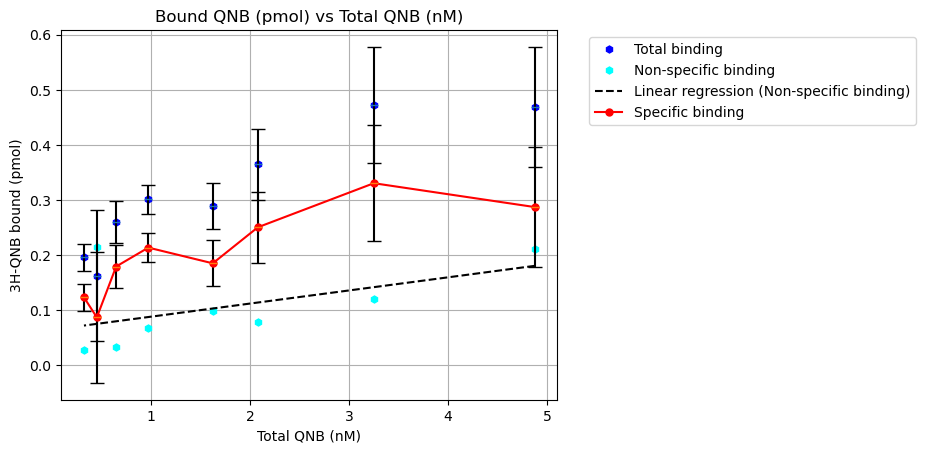

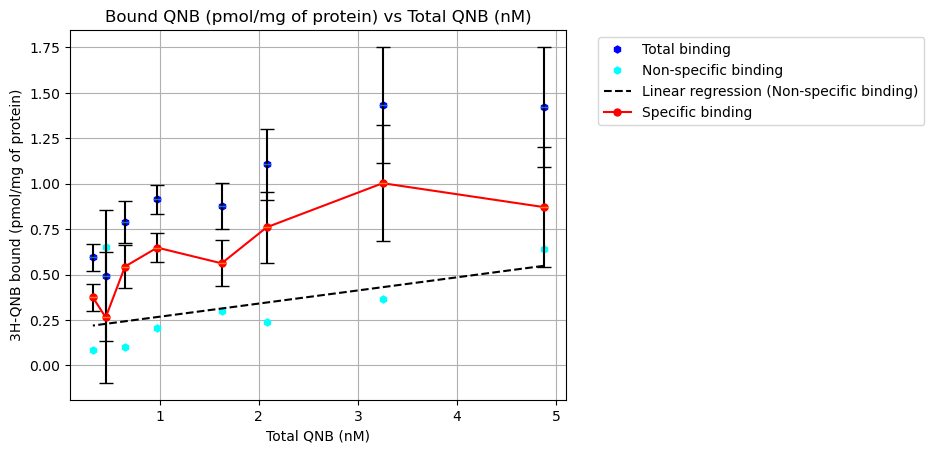

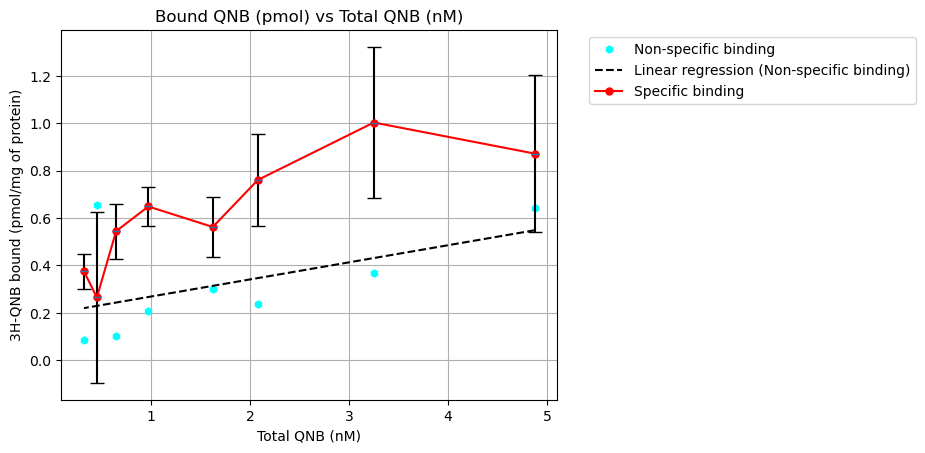

In [13]:
plt.figure()
plt.subplot()
plt.plot(xAxisD3,yAxisNoAt,'h',color="blue",markersize=5, label="Total binding")
plt.plot(xAxisD3,yAxisAt,'h',color="cyan",markersize=5, label="Non-specific binding")
plt.errorbar(xAxisD3,yAxisNoAt,yerr=yErrNoAt,ecolor="black",fmt="_",capsize=5)
plt.errorbar(xAxisD3,yAxisSpecificLine,yerr=yErrNoAt,ecolor="black",fmt="_",capsize=5)
plt.plot(xAxisD3,regEquationNonSpecific(xAxisD3),"--k",label="Linear regression (Non-specific binding)")
plt.plot(xAxisD3,yAxisSpecificLine,'-o',color="red",markersize=5, label="Specific binding")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.title('Bound QNB (pmol) vs Total QNB (nM)')
plt.xlabel("Total QNB (nM)")
plt.ylabel("3H-QNB bound (pmol)")
plt.show()

plt.figure()
plt.subplot()
plt.plot(xAxisD3,yAxisNoAtperProt,'h',color="blue",markersize=5, label="Total binding")
plt.plot(xAxisD3,yAxisAtperProt,'h',color="cyan",markersize=5, label="Non-specific binding")
plt.errorbar(xAxisD3,yAxisNoAtperProt,yerr=yErrNoAtperProt,ecolor="black",fmt="_",capsize=5)
plt.errorbar(xAxisD3,yAxisSpecificLineperProt,yerr=yErrNoAtperProt,ecolor="black",fmt="_",capsize=5)
plt.plot(xAxisD3,regEquationNonSpecificperProt(xAxisD3),"--k",label="Linear regression (Non-specific binding)")
plt.plot(xAxisD3,yAxisSpecificLineperProt,'-o',color="red",markersize=5, label="Specific binding")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.title('Bound QNB (pmol/mg of protein) vs Total QNB (nM)')
plt.xlabel("Total QNB (nM)")
plt.ylabel("3H-QNB bound (pmol/mg of protein)")
plt.show()

plt.figure()
plt.subplot()
plt.plot(xAxisD3,yAxisAtperProt,'h',color="cyan",markersize=5, label="Non-specific binding")
plt.errorbar(xAxisD3,yAxisSpecificLineperProt,yerr=yErrNoAtperProt,ecolor="black",fmt="_",capsize=5)
plt.plot(xAxisD3,regEquationNonSpecificperProt(xAxisD3),"--k",label="Linear regression (Non-specific binding)")
plt.plot(xAxisD3,yAxisSpecificLineperProt,'-o',color="red",markersize=5, label="Specific binding")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.title('Bound QNB (pmol) vs Total QNB (nM)')
plt.xlabel("Total QNB (nM)")
plt.ylabel("3H-QNB bound (pmol/mg of protein)")
plt.show()


Scatchard plot for the obtention of an initial Kd for QNB

In [14]:
freeQNB=[]
specificBoundQNB=[]
totalQNBBinding=[]
yAxisScat=[]
totalQNB=xAxisD3 # Get concentration of the total QNB in nM
for i in range(len(totalQNB)):
    specificBoundQNB.append(yAxisSpecificLine[i]/(0.002*convNanoToPico)) # Get concentration the specific QNB bound in nM
    totalQNBBinding.append(yAxisNoAt[i]/(0.002*convNanoToPico)) # Get concentration of the total QNB bound (both specific and non specific) in nM
for i in range(len(totalQNB)):
    freeQNB.append(totalQNB[i]-totalQNBBinding[i]) # Get the concentration of the free QNB in nM
for i in range(len(totalQNB)):
    yAxisScat.append(specificBoundQNB[i]/freeQNB[i])
#Linear regression to Scatchard Plot
scat=np.polyfit(specificBoundQNB,yAxisScat,1)
regEquationScat=np.poly1d(scat)
print("Line equation for Scatchard Plot is: ", regEquationScat)
kdVal=-1/scat[0]
print("Kd of QNB is ", kdVal , " nM")

Line equation for Scatchard Plot is:   
-1.299 x + 0.2478
Kd of QNB is  0.7697793893748908  nM


Graph for the Scatchard Plot with line adjustment

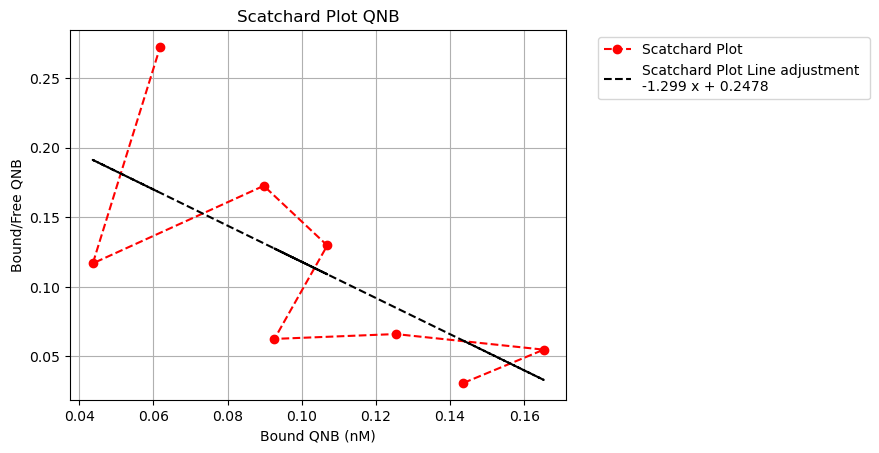

In [15]:
plt.figure()
plt.subplot()
plt.plot(specificBoundQNB,yAxisScat,'--o',color="red",label="Scatchard Plot")
plt.plot(specificBoundQNB,regEquationScat(specificBoundQNB),"--k",label="Scatchard Plot Line adjustment" + str(regEquationScat))
plt.title('Scatchard Plot QNB')
plt.xlabel("Bound QNB (nM)")
plt.ylabel("Bound/Free QNB")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

Non-linear least squares adjustment (one-site fit)

In [16]:
# Non-linear Least Squares
Binit=-scat[1]/scat[0]
Kdinit=kdVal
model = lmfit.models.ExpressionModel("(Btot * x/(Kd+x))") # what we are fitting. Equation for curve.
params = model.make_params(Btot=Binit, Kd=Kdinit)
onesite_fit = model.fit(specificBoundQNB, params, x=freeQNB) #  Fit B values as a function of F values
print(onesite_fit.fit_report())

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 8
    # variables        = 2
    chi-square         = 0.00229782
    reduced chi-square = 3.8297e-04
    Akaike info crit   = -61.2418839
    Bayesian info crit = -61.0830008
    R-squared          = 0.80095999
[[Variables]]
    Btot:  0.16984889 +/- 0.02129741 (12.54%) (init = 0.1907843)
    Kd:    0.61295300 +/- 0.24560274 (40.07%) (init = 0.7697794)
[[Correlations]] (unreported correlations are < 0.100)
    C(Btot, Kd) = +0.8626


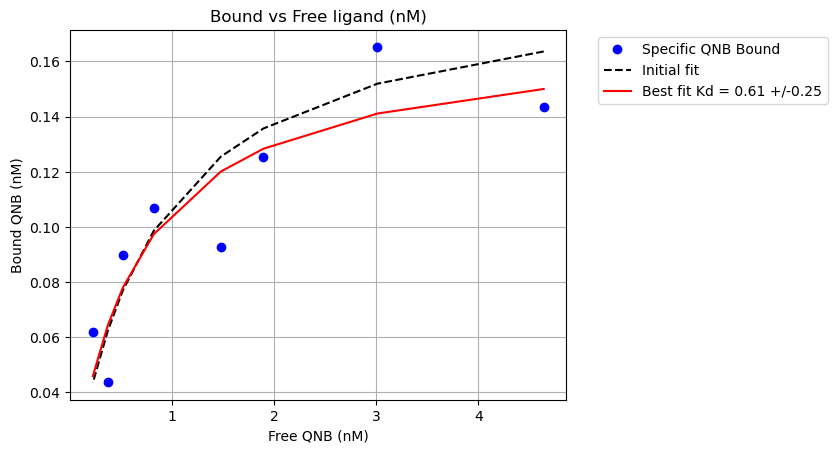

<Axes: title={'center': 'Model(_eval)'}, ylabel='residuals'>

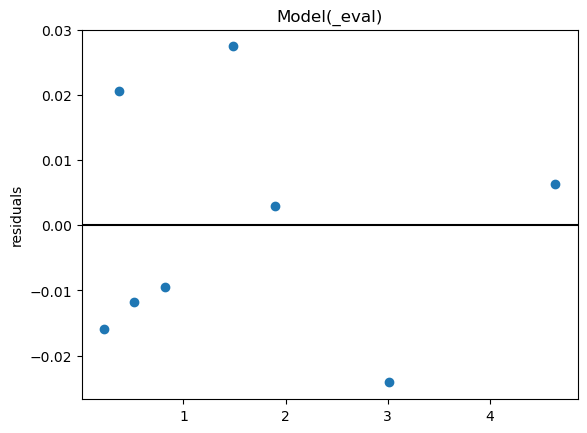

In [17]:
plt.figure()
plt.subplot()
plt.plot(freeQNB,specificBoundQNB,'o',color="blue",label="Specific QNB Bound")
plt.plot(freeQNB, onesite_fit.init_fit, 'k--', label='Initial fit')
plt.plot(freeQNB, onesite_fit.best_fit, 'r-', label='Best fit Kd = '+ str(round(onesite_fit.params["Kd"].value,2))+" +/-" + str(round(onesite_fit.params["Kd"].stderr,2)))
plt.grid()
plt.title('Bound vs Free ligand (nM)')
plt.xlabel("Free QNB (nM)")
plt.ylabel("Bound QNB (nM)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
onesite_fit.plot_residuals()

Non-linear least squares adjustment (two-sites fit)

In [18]:
model2 = lmfit.models.ExpressionModel("(Btot * x/(Kd+x)+Btot*(x/Kd2)+c)") # what we are fitting. Equation for curve.
params2 = model2.make_params(Btot=Binit, Kd=Kdinit,Kd2=3000,c=0)# Set starting values
twosite_fit = model2.fit(specificBoundQNB, params2, x=freeQNB) #  Fit B values as a functiom of F values
print(twosite_fit.fit_report())

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 77
    # data points      = 8
    # variables        = 4
    chi-square         = 0.00215353
    reduced chi-square = 5.3838e-04
    Akaike info crit   = -57.7606939
    Bayesian info crit = -57.4429277
    R-squared          = 0.81345834
[[Variables]]
    Btot:  0.15827561 +/- 0.30071889 (190.00%) (init = 0.1907843)
    Kd:    1.21476863 +/- 4.88321327 (401.99%) (init = 0.7697794)
    Kd2:   40495564.1 +/- 2.5272e+14 (624073807.44%) (init = 3000)
    c:     0.02921709 +/- 0.06714996 (229.83%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Btot, Kd2) = +0.9912
    C(Btot, Kd)  = +0.9411
    C(Kd, Kd2)   = +0.9350
    C(Kd, c)     = +0.9112
    C(Kd2, c)    = +0.7490
    C(Btot, c)   = +0.7330


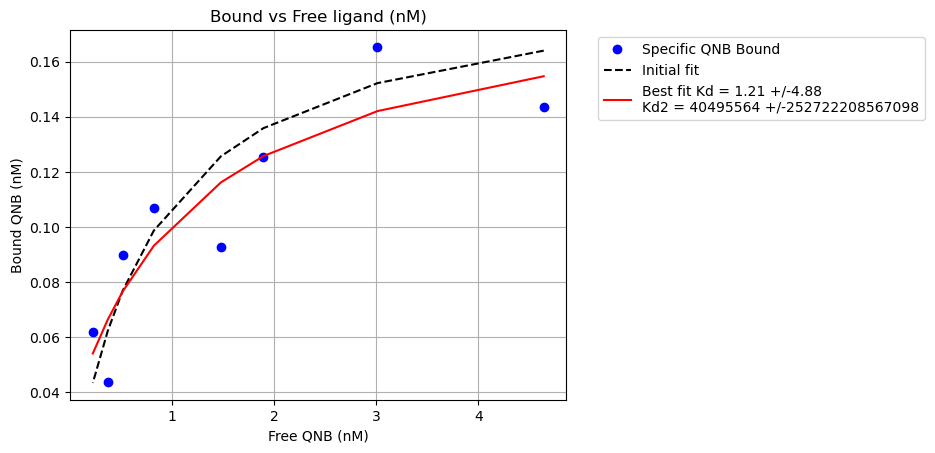

<Axes: title={'center': 'Model(_eval)'}, ylabel='residuals'>

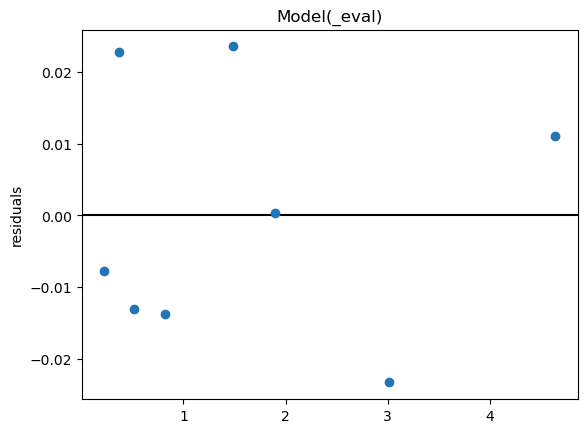

In [19]:
plt.figure()
plt.subplot()
plt.plot(freeQNB,specificBoundQNB,'o',color="blue",label="Specific QNB Bound")
plt.plot(freeQNB, twosite_fit.init_fit, 'k--', label='Initial fit')
plt.plot(freeQNB, twosite_fit.best_fit, 'r-', label='Best fit Kd = '+ str(round(twosite_fit.params["Kd"].value,2))+" +/-" + str(round(twosite_fit.params["Kd"].stderr,2))+' \nKd2 = '+ str(round(twosite_fit.params["Kd2"].value))+" +/-" + str(round(twosite_fit.params["Kd2"].stderr)))
plt.grid()
plt.title('Bound vs Free ligand (nM)')
plt.xlabel("Free QNB (nM)")
plt.ylabel("Bound QNB (nM)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
twosite_fit.plot_residuals()